In [1]:
import pandas as pd

### reading the file after data cleaning

In [2]:
O_df=pd.read_csv("Final_df0504.csv")

In [3]:
O_df.dtypes

Unnamed: 0        int64
Maker            object
Genmodel         object
Genmodel_id      object
Adv_id           object
Adv_year          int64
Adv_month         int64
Reg_year          int64
Years             int64
Bodytype         object
Runned_miles      int64
Engin_size      float64
Gearbox          object
Fuel_type        object
Price             int64
Engine_power    float64
Annual_tax      float64
Wheelbase         int64
Height            int64
Width             int64
Length            int64
Average_mpg       int64
Top_speed         int64
Seat_num          int64
Door_num          int64
Inflation       float64
Sales             int64
Entrée_price      int64
Gas_emission      int64
Fuel_type.1     float64
dtype: object

### Droping the unnecessery columns

In [4]:
df=O_df.drop(['Genmodel','Genmodel_id',"Adv_id",'Maker',],axis="columns")

In [5]:
df.dtypes

Unnamed: 0        int64
Adv_year          int64
Adv_month         int64
Reg_year          int64
Years             int64
Bodytype         object
Runned_miles      int64
Engin_size      float64
Gearbox          object
Fuel_type        object
Price             int64
Engine_power    float64
Annual_tax      float64
Wheelbase         int64
Height            int64
Width             int64
Length            int64
Average_mpg       int64
Top_speed         int64
Seat_num          int64
Door_num          int64
Inflation       float64
Sales             int64
Entrée_price      int64
Gas_emission      int64
Fuel_type.1     float64
dtype: object

### Performing the one hot encoding on the colums which are of data type object and droping the orginal column

In [6]:
import pandas as pd

def one_hot_encode(df):
    # Identify columns with object dtype
    object_cols = df.select_dtypes(include=['object']).columns
    
    # Create dummy variables for each object column and drop the first one
    dummy_cols = pd.get_dummies(df[object_cols], drop_first=True)
    
    # Drop the original object columns from the DataFrame
    df_encoded = df.drop(object_cols, axis=1)
    
    # Concatenate the dummy variables with the original DataFrame
    df_encoded = pd.concat([df_encoded, dummy_cols], axis=1)
    
    return df_encoded


In [7]:
df_encoded=one_hot_encode(df)

In [8]:
df_encoded.dtypes

Unnamed: 0                                     int64
Adv_year                                       int64
Adv_month                                      int64
Reg_year                                       int64
Years                                          int64
Runned_miles                                   int64
Engin_size                                   float64
Price                                          int64
Engine_power                                 float64
Annual_tax                                   float64
Wheelbase                                      int64
Height                                         int64
Width                                          int64
Length                                         int64
Average_mpg                                    int64
Top_speed                                      int64
Seat_num                                       int64
Door_num                                       int64
Inflation                                    f

## corelation after encoding

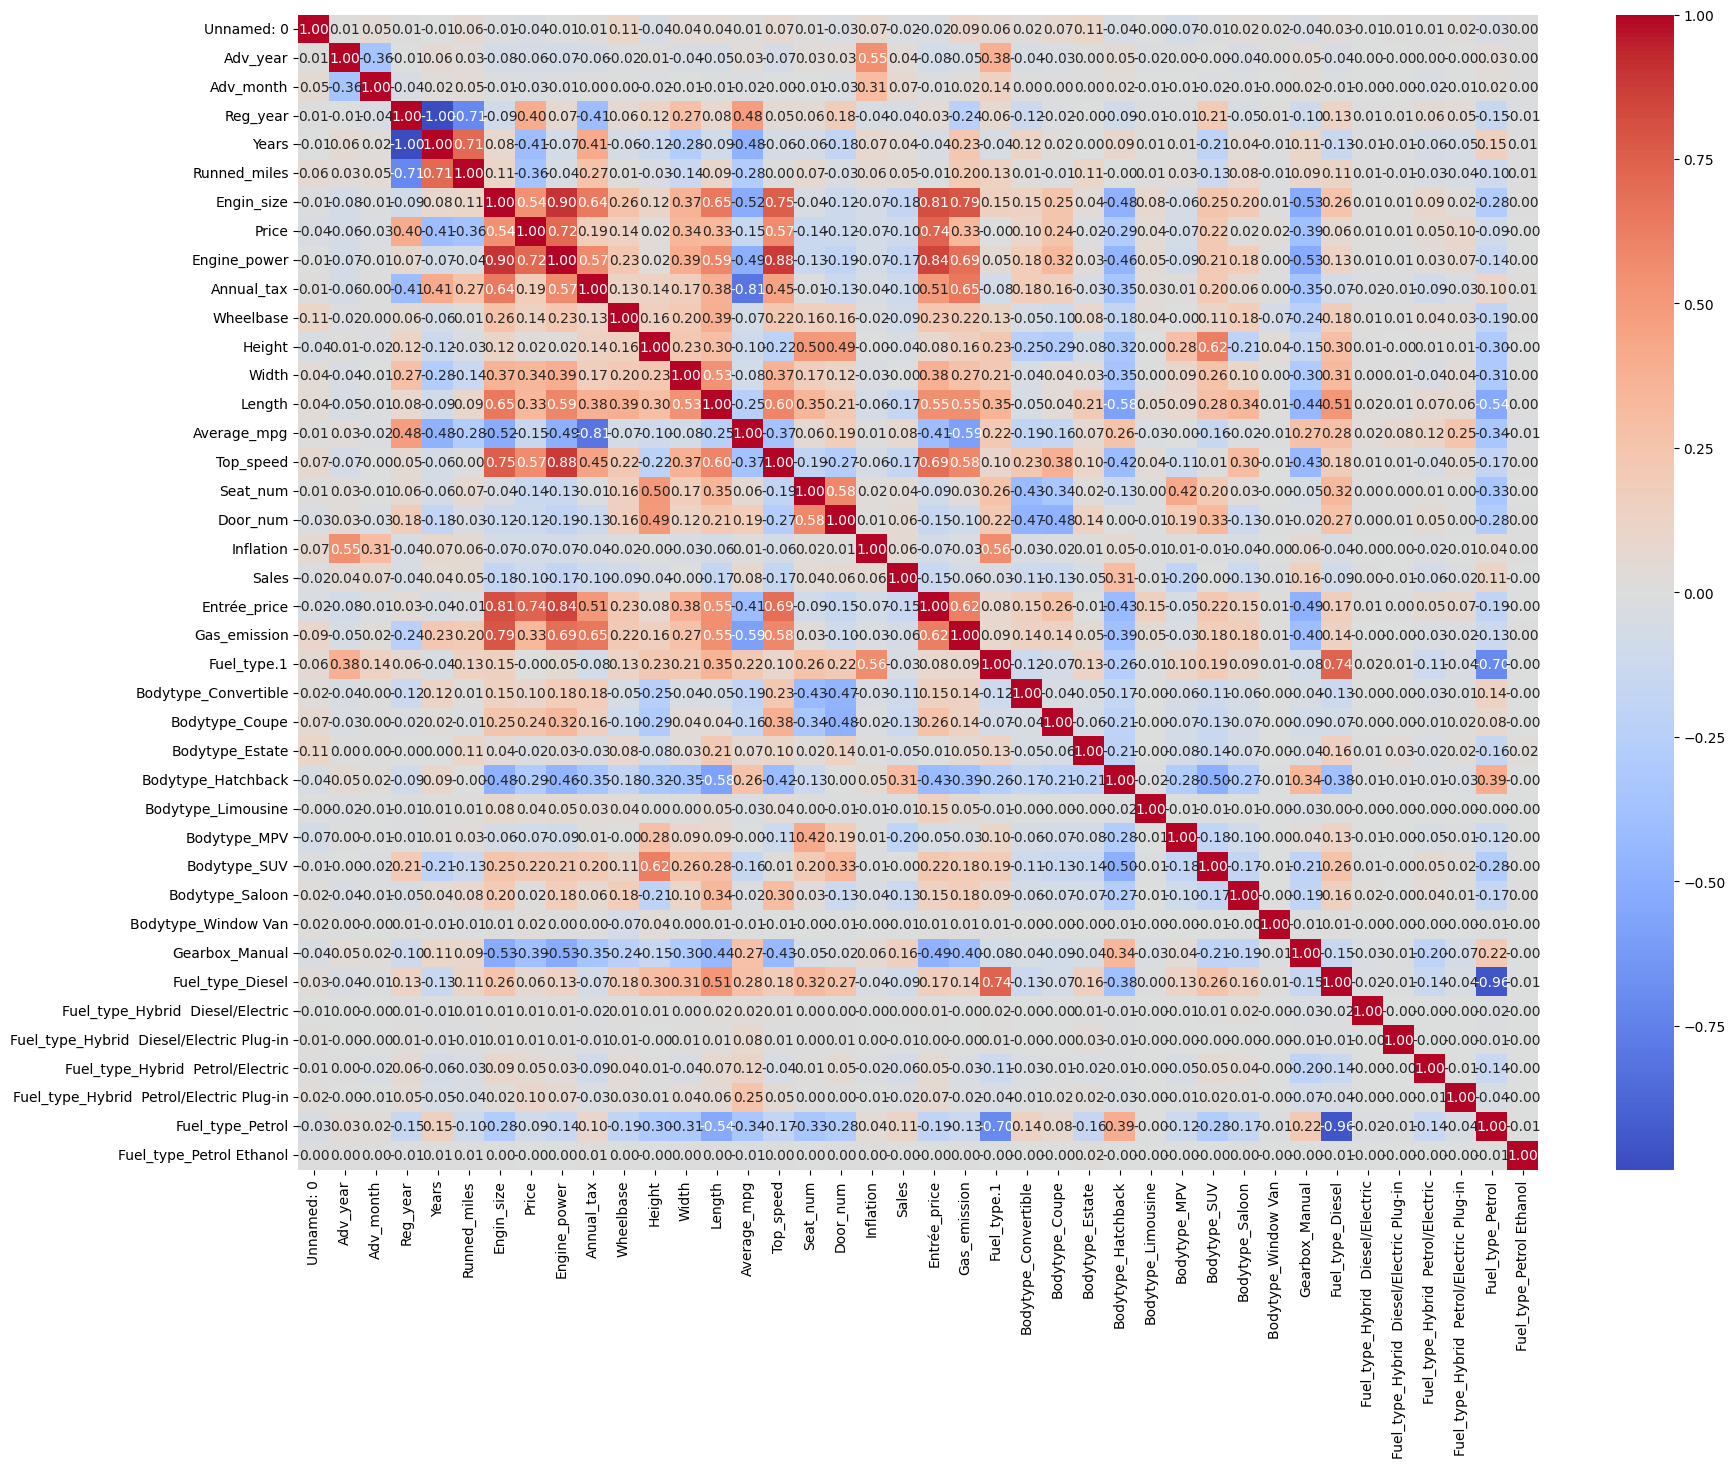

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm')
plt.show()

In [10]:
df_encoded.columns

Index(['Unnamed: 0', 'Adv_year', 'Adv_month', 'Reg_year', 'Years',
       'Runned_miles', 'Engin_size', 'Price', 'Engine_power', 'Annual_tax',
       'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', 'Top_speed',
       'Seat_num', 'Door_num', 'Inflation', 'Sales', 'Entrée_price',
       'Gas_emission', 'Fuel_type.1', 'Bodytype_Convertible', 'Bodytype_Coupe',
       'Bodytype_Estate', 'Bodytype_Hatchback', 'Bodytype_Limousine',
       'Bodytype_MPV', 'Bodytype_SUV', 'Bodytype_Saloon',
       'Bodytype_Window Van', 'Gearbox_Manual', 'Fuel_type_Diesel',
       'Fuel_type_Hybrid  Diesel/Electric',
       'Fuel_type_Hybrid  Diesel/Electric Plug-in',
       'Fuel_type_Hybrid  Petrol/Electric',
       'Fuel_type_Hybrid  Petrol/Electric Plug-in', 'Fuel_type_Petrol',
       'Fuel_type_Petrol Ethanol'],
      dtype='object')

# 

# 

## Polynomial  Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
# Specify the columns to use as features
feature_cols = ["Years",'Entrée_price','Runned_miles', 'Length',"Seat_num","Bodytype_Convertible",
                "Bodytype_Coupe","Bodytype_Estate","Bodytype_Hatchback","Bodytype_Limousine",
                "Bodytype_MPV","Bodytype_SUV","Bodytype_Saloon","Bodytype_Window Van", 
       "Gas_emission"]


# Split the DataFrame into features and target
X = df_encoded[feature_cols]
y = df_encoded['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Create polynomial features
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_poly_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training set R^2 score: {r2_train:.3f}")

# Make predictions on the test set
y_test_pred = model.predict(X_poly_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test set R^2 score: {r2_test:.3f}")


Training set R^2 score: 0.897
Test set R^2 score: 0.882


### features are added into the polynomial model in with reference to corelation values
### By also considering high multi colinearity among features
### Even though Gas_Emission have low corelation with price it is able to explain 4% of the variance
### After iterating all the features train and test scores came up to 87% which makes it numarically a good model
### But some fetures few features have high multi colinearity which is disrupting the model in some cases 
### By the fact that multi colineary have high effect on polynomial model my confidence in the model prediction is low

# 

# 

## Decision Trees

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
# Specify the columns to use as features
feature_cols = ["Years",'Entrée_price', 'Length','Runned_miles','Engin_size',"Seat_num","Bodytype_Convertible",
                "Bodytype_Coupe","Bodytype_Estate","Bodytype_Hatchback","Bodytype_Limousine",
                "Bodytype_MPV","Bodytype_SUV","Bodytype_Saloon","Bodytype_Window Van", 
       "Gas_emission",'Wheelbase', 'Height', 'Width',"Average_mpg"]


# Split the DataFrame into features and target
X = df_encoded[feature_cols]
y = df_encoded['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
tree = DecisionTreeRegressor(max_depth=20)

# Fit the model on the training data
tree.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = tree.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training set R^2 score: {r2_train:.3f}")

# Make predictions on the test set
y_test_pred = tree.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test set R^2 score: {r2_test:.3f}")


Training set R^2 score: 0.998
Test set R^2 score: 0.964


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
tree_reg = DecisionTreeRegressor()

# Define the hyperparameters to search over
params = {'max_depth': range(5, 20)}

# Define the grid search object
grid = GridSearchCV(tree_reg, param_grid=params, scoring='r2', cv=5)

# Fit the grid search object to the data
grid.fit(X_train, y_train)

# Print the best hyperparameters and R-squared value
print("Best hyperparameters:", grid.best_params_)
print("Test set R-squared:", grid.best_score_)

Best hyperparameters: {'max_depth': 14}
Test set R-squared: 0.9540362820024215


In [14]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
tree = DecisionTreeRegressor(max_depth=14)

# Fit the model on the training data
tree.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = tree.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training set R^2 score: {r2_train:.3f}")

# Make predictions on the test set
y_test_pred = tree.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test set R^2 score: {r2_test:.3f}")

Training set R^2 score: 0.992
Test set R^2 score: 0.963


In [41]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
tree = DecisionTreeRegressor(max_depth=10)

# Fit the model on the training data
tree.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = tree.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training set R^2 score: {r2_train:.3f}")

# Make predictions on the test set
y_test_pred = tree.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test set R^2 score: {r2_test:.3f}")


Training set R^2 score: 0.977
Test set R^2 score: 0.955


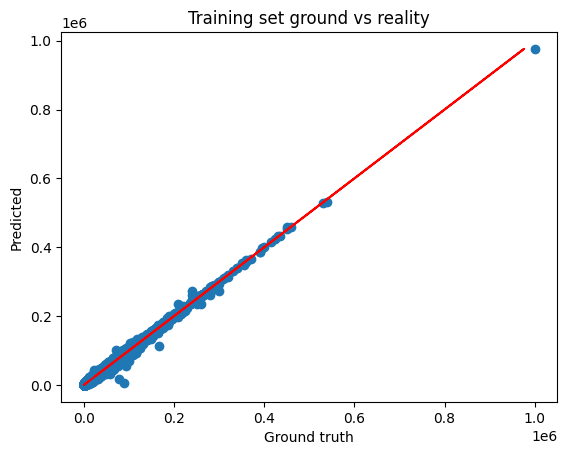

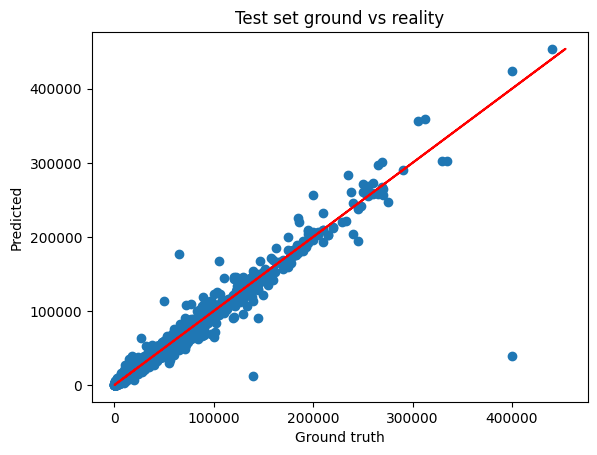

In [42]:
plt.scatter(y_train, y_pred_train)
plt.plot(y_pred_train, y_pred_train, color='red', label='Predicted')
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.title("Training set ground vs reality")
plt.show()

# Create scatter plot with test data
plt.scatter(y_test, y_pred_test)
plt.plot(y_pred_test, y_pred_test, color='red', label='Predicted')
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.title("Test set ground vs reality")
plt.show()

### The initial decision tree model we built gave R^2 values of 0.998 for train and 0.964 for test data. Upon employing the GridSearchCV, we found the max_depth=14 would give the most optimal result. 

### The result from Max_depth=14 gave R^2 score for train, 0.992, and R^2 score for test, 0.964. However, upon trial and error, we found that max_depth=10 achieves R^2 values of 0.977 for train and 0.955 for test data. This gives lesser variance by sacrificing 0.09 R^2 value, compared to depth of 14.

In [16]:
# Print feature importances with original feature names
importance = tree.feature_importances_
feature_names = X_train.columns.tolist()
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (feature_names[i], v))


Feature: Years, Score: 0.17550
Feature: Entrée_price, Score: 0.62256
Feature: Length, Score: 0.00811
Feature: Runned_miles, Score: 0.10663
Feature: Engin_size, Score: 0.01791
Feature: Seat_num, Score: 0.00056
Feature: Bodytype_Convertible, Score: 0.00007
Feature: Bodytype_Coupe, Score: 0.00090
Feature: Bodytype_Estate, Score: 0.00000
Feature: Bodytype_Hatchback, Score: 0.00002
Feature: Bodytype_Limousine, Score: 0.00005
Feature: Bodytype_MPV, Score: 0.00009
Feature: Bodytype_SUV, Score: 0.00048
Feature: Bodytype_Saloon, Score: 0.00017
Feature: Bodytype_Window Van, Score: 0.00000
Feature: Gas_emission, Score: 0.00459
Feature: Wheelbase, Score: 0.00751
Feature: Height, Score: 0.02014
Feature: Width, Score: 0.00996
Feature: Average_mpg, Score: 0.02472


# 

# 

## Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor object
rf = RandomForestRegressor(n_estimators=120, max_depth=25)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training set R^2 score: {r2_train:.3f}")

# Make predictions on the test set
y_test_pred = rf.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test set R^2 score: {r2_test:.3f}")


Training set R^2 score: 0.994
Test set R^2 score: 0.972


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor()

# Define the hyperparameters to search over
params = {'n_estimators': (50, 75, 100, 120), 'max_depth':(10,15,20,25) }

# Define the grid search object
grid = GridSearchCV(rf, param_grid=params, scoring='r2', cv=5)

# Fit the grid search object to the data
grid.fit(X_train, y_train)

# Print the best hyperparameters and R-squared value
print("Best hyperparameters:", grid.best_params_)
print("Test set R-squared:", grid.best_score_)

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor object
rf = RandomForestRegressor(n_estimators=100, max_depth=20)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training set R^2 score: {r2_train:.3f}")

# Make predictions on the test set
y_test_pred = rf.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test set R^2 score: {r2_test:.3f}")

Training set R^2 score: 0.993
Test set R^2 score: 0.972


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_pred_train)
print("Train data Mean Squared Error:", mse)

r2 = r2_score(y_train, y_pred_train)
print("Train data R-squared Score:", r2)

mse = mean_squared_error(y_test, y_pred_test)
print("Test data Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred_test)
print("Test data R-squared Score:", r2)

Train data Mean Squared Error: 2102401.837405952
Train data R-squared Score: 0.9932268540511756
Test data Mean Squared Error: 8615875.692763811
Test data R-squared Score: 0.9706490576587739


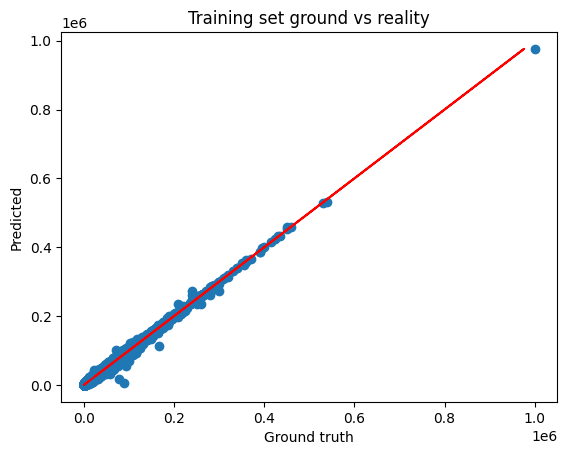

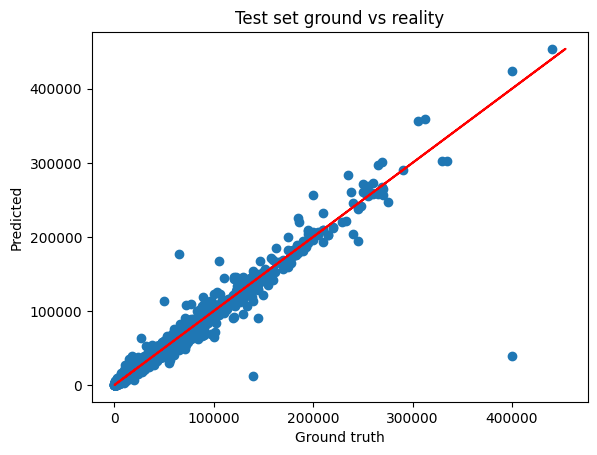

In [31]:
plt.scatter(y_train, y_pred_train)
plt.plot(y_pred_train, y_pred_train, color='red', label='Predicted')
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.title("Training set ground vs reality")
plt.show()

# Create scatter plot with test data
plt.scatter(y_test, y_pred_test)
plt.plot(y_pred_test, y_pred_test, color='red', label='Predicted')
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.title("Test set ground vs reality")
plt.show()

### Executing a GridSearch on RandomForest regressor was very computationally time taking. After execution, we got the best result as n_estimators = 100, max_depth = 20. This has also been verified by trial and error method.
### The R^2 values for train and test data are 0.993 and 0.970

### From the plots, we could also see the outliers, which are affecting the MSE. However, the accuracy is close to 100 and 97% of the variance is addressed by the model, making it a good regressor overall.

# 

# 

## Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a GradientBoostingRegressor object
gb = GradientBoostingRegressor(n_estimators=150, learning_rate=0.2, max_depth=20)

# Fit the model on the training data
gb.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = gb.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_pred_train)
print(f"Training set R^2 score: {r2_train:.3f}")
print(f"Train data Mean Squared Error: {mse:.3f}")

# Make predictions on the test set
y_test_pred = gb.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Test set R^2 score: {r2_test:.3f}")
print(f"Train data Mean Squared Error: {mse:.3f}")


Training set R^2 score: 1.000
Train data Mean Squared Error: 2102401.837
Test set R^2 score: 0.965
Train data Mean Squared Error: 8615875.693


In [40]:

# Create a GradientBoostingRegressor object
gb = GradientBoostingRegressor(n_estimators=50, learning_rate=0.3, max_depth=5)

# Fit the model on the training data
gb.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = gb.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training set Mean Squared Error (MSE): {mse_train:.3f}")
print(f"Training set R^2 score: {r2_train:.3f} \n")

# Make predictions on the test set
y_test_pred = gb.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test set Mean Squared Error (MSE): {mse_test:.3f}")
print(f"Test set R^2 score: {r2_test:.3f}")

Training set Mean Squared Error (MSE): 7271011.159
Training set R^2 score: 0.977 

Test set Mean Squared Error (MSE): 11896754.435
Test set R^2 score: 0.959


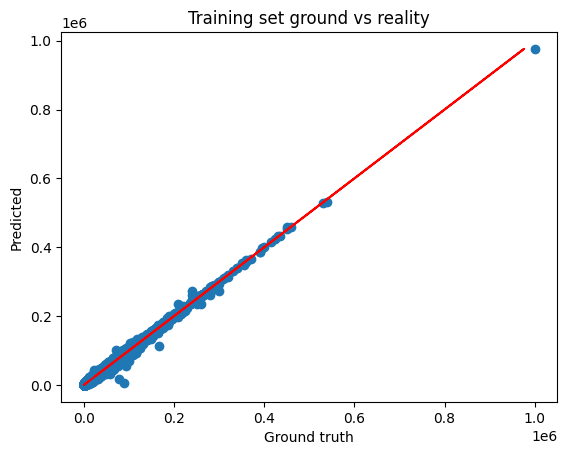

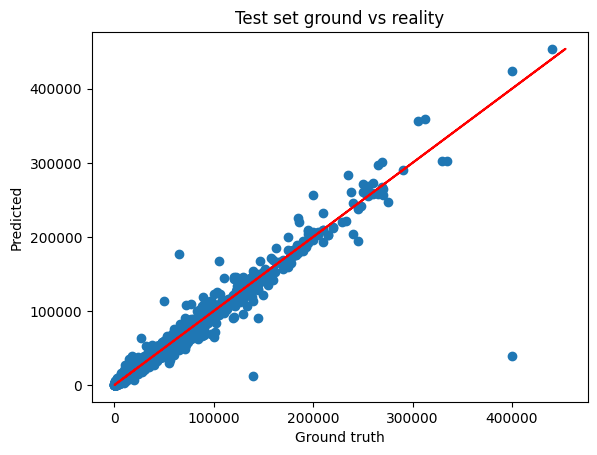

In [34]:
plt.scatter(y_train, y_pred_train)
plt.plot(y_pred_train, y_pred_train, color='red', label='Predicted')
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.title("Training set ground vs reality")
plt.show()

# Create scatter plot with test data
plt.scatter(y_test, y_pred_test)
plt.plot(y_pred_test, y_pred_test, color='red', label='Predicted')
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.title("Test set ground vs reality")
plt.show()

### For GradientBoosting regressor, we initially considered n_estimators=150, learning_rate=0.2, max_depth=20, that gave the R^2 values of 1.00 and 0.965 respectively for traina nd test dataset. But, upon performing the trail and error methods, we have come to conclusion that the parameters combination of n_estimators=50, learning_rate=0.3, max_depth=5 give the best possible outcome, withg lesser variance. The final R^2 values are 0.977, 0.959 for train and test datasets (almost 0.20 lesser variance than initial, by sacrificing 0.06 accuracy in train dataset than earlier).

# 

# 

## XGBoosting Regressor

In [20]:
import xgboost as xgb
xgb_m= xgb.XGBRegressor(n_estimators=800, max_depth=8, eta=0.03, subsample=0.8)
xgb_m.fit(X_train, y_train)
y_pred_train=xgb_m.predict(X_train)
y_pred_test=xgb_m.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_pred_train)
print("Train data Mean Squared Error:", mse)

r2 = r2_score(y_train, y_pred_train)
print("Train data R-squared Score:", r2)

mse = mean_squared_error(y_test, y_pred_test)
print("Test data Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred_test)
print("Test data R-squared Score:", r2)

Train data Mean Squared Error: 2102401.837405952
Train data R-squared Score: 0.9932268540511756
Test data Mean Squared Error: 8615875.692763811
Test data R-squared Score: 0.9706490576587739


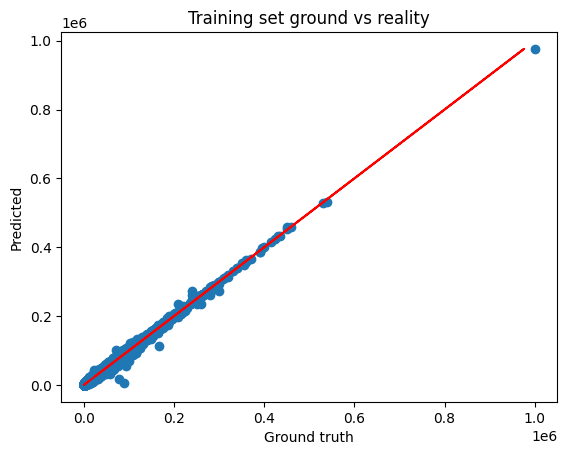

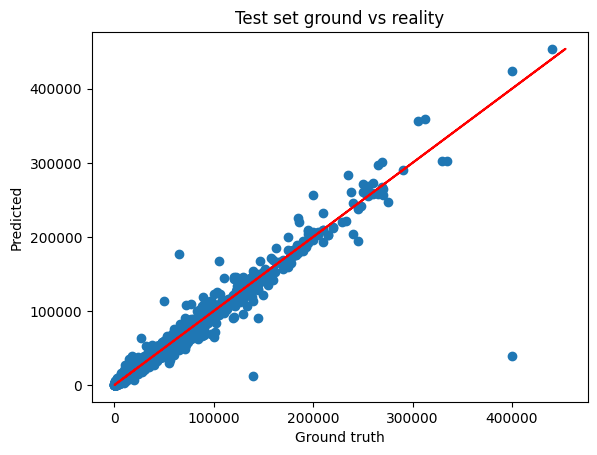

In [23]:
plt.scatter(y_train, y_pred_train)
plt.plot(y_pred_train, y_pred_train, color='red', label='Predicted')
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.title("Training set ground vs reality")
plt.show()

# Create scatter plot with test data
plt.scatter(y_test, y_pred_test)
plt.plot(y_pred_test, y_pred_test, color='red', label='Predicted')
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.title("Test set ground vs reality")
plt.show()

### XGBoost gives best overall performance with R^2 valeus of 0.993 in train and 0.970 in test data. But, Given the need for computationally efficient system, this could be a second choice.

# 

# 

## Fully Connected Neural Network

In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))

# Add additional hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
# Add output layer
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_train)

# Print predictions
print(predictions)

Epoch 1/50
4709/4709 [==============================] - 13s 2ms/step - loss: 60911008.0000
Epoch 2/50
4709/4709 [==============================] - 12s 2ms/step - loss: 53973552.0000
Epoch 3/50
4709/4709 [==============================] - 14s 3ms/step - loss: 51356632.0000
Epoch 4/50
4709/4709 [==============================] - 13s 3ms/step - loss: 51353880.0000
Epoch 5/50
4709/4709 [==============================] - 12s 3ms/step - loss: 49763948.0000
Epoch 6/50
4709/4709 [==============================] - 14s 3ms/step - loss: 48646264.0000
Epoch 7/50
4709/4709 [==============================] - 12s 3ms/step - loss: 48122792.0000
Epoch 8/50
4709/4709 [==============================] - 12s 2ms/step - loss: 48145632.0000
Epoch 9/50
4709/4709 [==============================] - 12s 2ms/step - loss: 46852232.0000
Epoch 10/50
4709/4709 [==============================] - 12s 3ms/step - loss: 45564348.0000
Epoch 11/50
4709/4709 [==============================] - 12s 2ms/step - loss: 47059196.00

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, predictions)
print("Mean Squared Error:", mse)

r2 = r2_score(y_train, predictions)
print("R-squared Score:", r2)

Mean Squared Error: 30334537.767309017
R-squared Score: 0.9022735578267874


In [37]:
test_predictions=model.predict(X_test)

1178/1178 [==============================] - 2s 1ms/step


In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, test_predictions)
print("R-squared Score:", r2)

Mean Squared Error: 25921985.075987063
R-squared Score: 0.911693864156557


### We could observe that the model works less effective than that of ensemble methods and decision trees. The R^2 value of test is mildly larger than that of train data. We believe that the model could further be improved by taking a larger dataset.

# 

# 

## Key Takeaways from the project:

### 1. Years, Runned Miles, Entry Price, Bodytype of the vehicle and Gas-emission are the most significant features that determine the resale price of a vehicle. 
### 2. We are able to explain most of the variance through our models.
### 3. There were no over-fitting issues found.
### 4. All ensemble methods yield closely similar results around 96%
### 5. The high MSE values can be accounted for the high price values in the target column. 
### 6. Given computational/time constraints, Decision Trees gives the best possible outcomes, whereas, XGBoosting gives the best predictions overall with 97% accuracy.